# 4. Підготовка та очистка даних у R

Матеріали розділу описують інформацію про виміри оцінки якості даних, підходи до визначення та обробки пропущених значень, а також розглядаються способи боротьби зі статистичними викидами.

> _Примітка. Додати теоретичну інформацію про нормальний розподіл, квантилі, Q1, Q3, IQR..._

---

_До початку роботи варто інстралювати наступні пакети:_

In [45]:
# install.packages("dplyr")
# install.packages("janitor")
# install.packages("stringr")
# install.packages("stringdist")
# install.packages("mice")
# install.packages("VIM")
# install.packages("Amelia")
# install.packages("tidyr")
# install.packages("Hmisc")
options(warn=-1) # Налаштування для блокування вивеження warning-повідомлень
Sys.setlocale("LC_ALL", "Ukrainian") # Налаштування для української лікалізації jupyter-ноутбуків

[1] "LC_COLLATE=Ukrainian_Ukraine.1251;LC_CTYPE=Ukrainian_Ukraine.1251;LC_MONETARY=Ukrainian_Ukraine.1251;LC_NUMERIC=C;LC_TIME=Ukrainian_Ukraine.1251"

---

## 1. Поняття та виміри оцінки якості даних <a class="anchor" id="id1"></a>

Якість даних залежить від очищення та коригування даних, які відсутні, некоректні, недійсні або нечитабельні. Для забезпечення достовірності даних важливо зрозуміти ключові аспекти якості даних, щоб оцінити, наскільки дані погані/хороші.

**Що таке валідація даних?**

Валідація даних відноситься до процесу забезпечення точності та якості даних. Він реалізується шляхом вбудовування кількох перевірок у систему або звітування для забезпечення логічної узгодженості введених і збережених даних.

На перший погляд, очевидно, що перетворення даних до якісних полягає в очищенні поганих даних – даних, які відсутні, неправильні або якимось чином недійсні. Але щоб переконатися, що дані заслуговують довіри, важливо розуміти ключові виміри якості даних, щоб оцінити, наскільки дані є «поганими».

Окремі компанії мають внутрішні документи, що визначають виміри оцінки якості даних та порядок його проведення - `Data Validation Framework` або `Data Quality Framework`.

Коли говорять про якість даних, то мається на увазі їх оцінка у кількох вимірах. Розглянемо коротко ці виміри:

- [x] Правильність / `Accuracy`
- [x] Повнота / `Completeness`
- [x] Узгодженість / `Consistency`
- [x] Відповідність / `Conformity`
- [x] Цілісність / `Integrity`
- [x] Своєчасність / `Timeliness`
- [x] Унікальність / `Uniqueness`


---

### Правильність / (Accuracy)

**Правильність** — це ступінь, до якого дані правильно відображають реальний об’єкт АБО описувану подію. 

Приклади:
- [x] Реальною вартістю є ціна продажу одиниці товару.
- [x] Адреса співробітника в `базі даних співробітників` є справжньою адресою.

Запитання, які ви можете задати собі: 

- [x] Чи об’єкти даних точно представляють значення «реального світу», які вони повинні моделювати? _Наприклад, чи правильно вказувати вік у сотнях тисяч років?_
- [x] Чи присутнє неправильне написання назв товарів чи осіб, адрес і навіть несвоєчасних чи неактуальних даних? 

Ці проблеми можуть вплинути на результатати аналітичних звітів, наприклад, неправильні середні значення певних показників.

---

### Повнота / (Completeness)

Повнота визначається як очікувана всебічність. Дані можуть бути повними, навіть якщо додаткові дані відсутні. Поки дані відповідають очікуванням, вони вважаються повними.

Наприклад, ім’я та прізвище замовника є обов'язковими, але прізвище необов’язково; тому запис можна вважати повним, навіть якщо прізвища не існує.

Питання, які ви можете задати собі: 

- [x] Чи доступна вся необхідна інформація? 
- [x] Чи мають якісь дані відсутні елементи? 
- [x] Або вони перебувають у непридатному для роботи вигляді?


---

### Узгодженість / Consistency

**Узгодженість** означає, що дані в усіх системах/таблицях відображають однакову інформацію та синхронізовані між собою.  

Приклади:
- [x] Статус бізнес-підрозділу "закритий", але є продажі для цього підрозділу.
- [x] Статус працівника "звільнено", але статус випалати заробіної плати містить суму відмінну від 0 за той самий період.
- [x] Зафіксовано, що клієнт має у банку депозити, але у даних про депозити записи по клієнту відсутні.

Запитання, які ви можете поставити собі: 

- [x] Чи однакові значення даних у наборах даних? 
- [x] Чи існують якісь різні випадки, коли однакові екземпляри даних надають суперечливу інформацію?

---

### Відповідність / Conformity

**Відповідність** означає, що дані відповідають набору стандартних визначень даних, як-от тип даних, розмір і формат. Наприклад, дата народження клієнта у форматі `dd/mm/yyyy` або відстань у км числом `100`, а не записом `100км`.

Запитання, які ви можете задати собі: 
- [x] Чи відповідають значення даних зазначеним форматам? 
- [x] Якщо так, то чи всі значення даних відповідають цим форматам?

Важливо підтримувати відповідність конкретним форматам.

---

### Цілісність / Integrity

**Цілісність** означає достовірність даних у взаємозв’язках і гарантує, що всі дані в базі даних можна відстежити та з’єднати з іншими даними.

Наприклад, у базі даних клієнтів має бути дійсний клієнт, адреси та відношення/зв'язки між ними. Якщо є дані про зв’язок адреси без клієнта, то ці дані недійсні й вважаються загубленим записом.

Запитайте себе: 
- [x] Чи є якісь дані без важливих зв’язків?

Неможливість пов’язати записи разом може призвести до дублювання у ваших системах.

---

### Своєчасність / Timeliness

**Своєчасність** показує, чи є інформація доступною, коли вона очікується та потрібна. Своєчасність даних дуже важлива. 

Це відображається в:
- [x] Компанії, які зобов’язані публікувати свої квартальні результати протягом певного періоду часу
- [x] Обслуговування клієнтів надає клієнтам актуальну інформацію
- [x] Кредитна система перевіряє активність рахунку кредитної картки в режимі реального часу

Своєчасність залежить від очікувань користувача. Доступність даних в Інтернеті може знадобитися для системи розподілу номерів у сфері готельного бізнесу.

Як бачите, якість даних є важливим питанням, яке слід враховувати, починаючи від етапу визначення цілей проекту, аж до впровадження, обслуговування та використання готово рішення у виробничі процесі підприємства.

---

## 2. Робота з неіменованими та "поганоіменованими" даними

### 2.1. Іменування даних <a class="anchor" id="id21"></a>

Першим прикладом проблем у даних можна розгянути читання неіменованих даних, тобто стопці таблиці не мають заголовків у файлі.

Створимо такий файл у блокноті і зчитаємо його:

In [46]:
data <- read.csv("../../data/untitled.csv")
data

X23,X185,X85.7,Male
<int>,<chr>,<dbl>,<chr>
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Зверніть увагу, що у якості стовпців взято перший рядок даних у додано `X` на початку. Зчитаємо дані із параметром, що вказує на відсутність заголовків:

In [47]:
data <- read.csv("../../data/untitled.csv", header = FALSE)
data

V1,V2,V3,V4
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Проблема іменування не вирішена, дані ми уже не втратили. Передамо одночасно з читанням інформацію про назви стовпців:

In [48]:
data <- read.csv("../../data/untitled.csv", 
            header = FALSE,
            col.names = c("Age","Height", "Weight", "Gender"))
data

Age,Height,Weight,Gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Ще одним варіантом задання назв стовпців є використання функції `colnames()` як для усіх різом, так і для окремого:

In [49]:
colnames(data) <- c("age", "height", "width", "gender")
data
colnames(data)[2] <- "HEIGHT"
data

age,height,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


age,HEIGHT,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


Також змінювати назви стовпців можна за допомогою функції `rename()` з пакету `dplyr`:

In [50]:
library(dplyr)

data <- data |> rename(AGE = age) # %>%
data

AGE,HEIGHT,width,gender
<int>,<chr>,<dbl>,<chr>
23,185,85.7,Male
41,175,68.3,M
11,142*,55.4,Female
12,NA,48.2,Man
54,171,NA,Looks like a man
32,168,78.0,F


---

### 2.2. Заміна назв стовпців data.frame <a class="anchor" id="id22">

Зчитаємо файл, що містить інформацію про осіб, але уже має іменовані стовтці: 

In [51]:
data <- read.csv("../../data/badtitled.csv")
data

Person.Age,Person__Height,person.Weight,Person.Gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,Male,NA
41,175,68.3,M,NA
11,142*,55.4,Female,NA
12,NA,48.2,Man,NA
54,191,NA,female,NA
32,168,78.0,F,NA
22,NA,54.0,male.,NA
21,165,NA,m,NA
14,NA,90.2,Man,NA


Швидко змінити назви стовпців та привести їх до однакового стилю можна за домогою бібліотеки `janitor`:

In [52]:
library(janitor)
clean <- clean_names(data)
colnames(clean)

[1] "person_age"    "person_height" "person_weight" "person_gender"
[5] "empty"

---

### 2.3. Підготовка та очистка текстової інформації

Зчитаємо інформацію про стать з попереднього прикладу:

In [53]:
data <- read.csv("../../data/badtitled.csv")
data <- clean_names(data)
data <- as.data.frame(data$person_gender)
colnames(data) <- c("gender")
unlist(data)

gender1  gender2  gender3  gender4  gender5  gender6  gender7  gender8 
  "Male"   "   M" "Female"    "Man" "female"  "F    "  "male."      "m" 
 gender9 gender10 gender11 gender12 gender13 
   "Man" "female"  "F    "  "male."      "m"

Схоже, що ці дані насправді мають всього 2 записи, проте у базу даних їх вносили різні люди або вони були зібрані з різних джерел інформації. Це досить поширена проблема у роботі з даними. Особливо коли відбуваєть заміна людей на рочих місцях або перехід на інше програмне забезпечення.

Якщо це буде розглядатися як факторна змінна без будь-якої попередньої обробки, очевидно, що 8, а не 2 класи будуть збережені. Тому завдання полягає в тому, щоб автоматично розпізнавати наведені вище дані про те, чи відноситься кожен елемент до чоловічої чи жіночої статі. У статистичних контекстах класифікацію таких
"безладні" текстові рядки в ряд фіксованих категорій часто називають кодуванням.

Опишемо два взаємодоповнюючих підходи до кодування рядків: `нормалізація` (`string normalization`) рядків і аналіз схожості тексту (`approximate text matching`).

Розглянемо наступні підходи до очистки текстових даних:

    – [x] Видалення пробілів на початку або в кінці
    – [x] Обрізання/збільшення рядків до певної ширини
    – [x] Перетворення у верхній/нижній регістр.
    – [x] Пошук рядків, що містять прості шаблони (підрядки).
    – [x] Апроксимація рядків на основі "відстаней".

Робота з текстом у `R` здійснюється за допомогою пакету `stringr`.

**Видалення пробілів на початку або в кінці** здійснюється за допомогою функції `str_trim()`.

In [54]:
library(stringr)
str_trim(" ostroh academy  ")
str_trim(" ostroh academy ", side = "left")
str_trim(" ostroh academy ", side = "right")

[1] "ostroh academy"

[1] "ostroh academy "

[1] " ostroh academy"

**Обрізання/збільшення рядків до певної ширини** здійснюється за допомогою функції `str_pad()`.

In [55]:
str_pad(57, width = 6, side = "left", pad = 0)

[1] "000057"

In [56]:
str_pad("ostroh", width = 10, side = "right", pad = "_")

[1] "ostroh____"

**Перетворення у верхній/нижній регістр**

In [57]:
text <- "Ostroh Academy!"
toupper(text)
tolower(text)

[1] "OSTROH ACADEMY!"

[1] "ostroh academy!"

**Пошук рядків, що містять прості шаблони (підрядки)**

Скористаємося функцієя `grep()` та `grepl()` для пошуку підрядків у інформації про стать:

In [58]:
grepl("m", data$gender) # Повертає TRUE/FALSE, якщо знахоить входження рядка
grep("m", data$gender) # Повертає номери рядків, по яких є входження

[1] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[13]  TRUE

[1]  3  5  7  8 10 12 13

In [59]:
grepl("m", data$gender, ignore.case = TRUE) # не враховує регістр букв
grepl("m", tolower(data$gender))

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE

In [60]:
data$gender
grepl("^m", data$gender, ignore.case = TRUE) # Показує усі збіги, що починаються з вказаної літери

[1] "Male"   "   M"   "Female" "Man"    "female" "F    "  "male."  "m"     
 [9] "Man"    "female" "F    "  "male."  "m"

[1]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[13]  TRUE

**Пошук "відстані" між ряжками** - це аналіз рядків на схожіть з визначенням рівня співпадінь.

In [61]:
adist("ao", "ao")
adist("ao", "oa")
adist("ao", "45fb")

0


2


4


Давайте проаналізуємо інформацію про стать з точки зору схожості текстів:

In [62]:
m <- c("male", "female")
adj_m <- adist(data$gender, m)
#adj_m <- adist(tolower(data$gender), m)
#adj_m <- adist(str_trim(tolower(data$gender), side="both"), m)
colnames(adj_m) <- m 
rownames(adj_m) <- data$gender
adj_m

,male,female
Male,1,3
M,4,6
Female,2,1
Man,3,5
female,2,0
F,5,6
male.,1,3
m,3,5
Man,3,5
female,2,0


In [63]:
# Видалимо повтори
adj_m |> as.data.frame() |> dplyr::distinct()

,male,female
,<dbl>,<dbl>
Male,1,3
X...M,4,6
Female,2,1
Man,3,5
female,2,0
F....,5,6


Примінимо інформацію про відстані до "нечистих" даних про стать:

In [64]:
nums <- apply(adj_m, 1, which.min) # Знайдемо найближчі значення
nums

Male      M Female    Man female  F      male.      m    Man female  F     
     1      1      2      1      2      1      1      1      1      2      1 
 male.      m 
     1      1

In [65]:
data.frame(initial = data$gender, coded = m[nums]) # FFFFFFFFFFFFFF - проблема!

initial,coded
<chr>,<chr>
Male,male
M,male
Female,female
Man,male
female,female
F,male
male.,male
m,male
Man,male


Як альтернативу для знаходження відстаней між рядками можна використовувати функції з бібліотеки `stringdist`.

In [66]:
library(stringdist)
adist("ao", "oa")
stringdist("oa", "ao") # 1, а було 2

2


[1] 1

Спробуємо "очистити" дані, які ми отримали з допомогою функції `amatch()`:

In [67]:
nums <- amatch(data$gender,  c("male", "female"), maxDist = 4) # Знайдемо найближчі значення
nums

[1]  1  1  2  1  2 NA  1  1  1  2 NA  1  1

In [68]:
data.frame(initial = data$gender, coded = m[nums]) # FFFFFFFFFFFFFF - проблема!

initial,coded
<chr>,<chr>
Male,male
M,male
Female,female
Man,male
female,female
F,NA
male.,male
m,male
Man,male


In [69]:
data <- data |> mutate(gender = ifelse(gender == "F", "female", gender)) # ????? # Space
data
data <- data |> mutate(gender = ifelse(str_trim(gender) == "F", "female", gender))
data
nums <- amatch(data$gender,  c("male", "female"), maxDist = 4)
data.frame(initial = data$gender, coded = m[nums]) 

gender
<chr>
Male
M
Female
Man
female
F
male.
m
Man


gender
<chr>
Male
M
Female
Man
female
female
male.
m
Man


initial,coded
<chr>,<chr>
Male,male
M,male
Female,female
Man,male
female,female
female,female
male.,male
m,male
Man,male


Місія виконана! Замінимо та збережемо інформацію у файл для майбутніх експериментів по цій темі:

In [70]:
data <- read.csv("../../data/badtitled.csv")
data <- clean_names(data)
head(data, 2)

,person_age,person_height,person_weight,person_gender,empty
,<int>,<chr>,<dbl>,<chr>,<lgl>
1,23,185,NA,Male,NA
2,41,175,68.3,M,NA


In [71]:
data <- data |> mutate(person_gender = ifelse(str_trim(person_gender) == "F", "female", person_gender))
m <- c("male", "female")
nums <- amatch(data$person_gender, m, maxDist = 4)
data <- data |> mutate(person_gender = m[nums])
data

person_age,person_height,person_weight,person_gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142*,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


Замінимо також висоту на числове значення, а не текст:

In [72]:
data <- data |> mutate(person_height = str_remove(data$person_height, pattern = "[*]"))
data

person_age,person_height,person_weight,person_gender,empty
<int>,<chr>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [73]:
data <- data |> mutate(person_height = as.numeric(person_height))
data

person_age,person_height,person_weight,person_gender,empty
<int>,<dbl>,<dbl>,<chr>,<lgl>
23,185,NA,male,NA
41,175,68.3,male,NA
11,142,55.4,female,NA
12,NA,48.2,male,NA
54,191,NA,female,NA
32,168,78.0,female,NA
22,NA,54.0,male,NA
21,165,NA,male,NA
14,NA,90.2,male,NA


In [74]:
write.csv(data, file = "../../data/cleaned_titled.csv", row.names = F)

---

## 3. Заміна пропусків у даних (Missing Value Imputation)

Дані реального світу часто мають відсутні значення. Дані можуть мати відсутні значення з ряду причин, таких як спостереження, які не були записані, пошкодження даних тощо.

**Проблема**
- [x] Обробка відсутніх даних важлива, оскільки багато алгоритмів машинного навчання або програм для візуалізації та аналізу данихне підтримують дані з відсутніми значеннями.

**Рішення**

- [x] Видалити рядки з відсутніми даними з набору даних.
- [x] Замінити відсутні значення середніми/медіанними значеннями.

**Примітка**

- [x] Використовуйте бізнес-логіку/знання для окремого підходу до кожної змінної
- [x] У разі малого розміру вибірки або великої частки спостережень із відсутніми значеннями бажано замінювати, а видаляти

Некоректна інформація в даних може бути записана різними способами, наприклад у датасеті ці дані можуть бутьу визначені як `NA` `<NA>` `NULL` `undefinded` `Undefined`. Перед обробкою таких даних усі невизначені записи варто конвертувати у `NA`.

Щоб переглянути список усіх стовпців, що мають пропуски даних можна скористатися наступним кодом:

In [75]:
data <- data <- read.csv("../../data/cleaned_titled.csv", na.strings = c("<NA>", "NA", "null", "undefined", "NULL", ""))
glimpse(data)

Rows: 13
Columns: 5
$ person_age    <int> 23, 41, 11, 12, 54, 32, 22, 21, 14, 51, 41, 66, 71
$ person_height <int> 185, 175, 142, NA, 191, 168, NA, 165, NA, 250, 20, NA, 1~
$ person_weight <dbl> NA, 68.3, 55.4, 48.2, NA, 78.0, 54.0, NA, 90.2, NA, 81.0~
$ person_gender <chr> "male", "male", "female", "male", "female", "female", "m~
$ empty         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA


### 3.1. Перевірка наявності пропусків у даних

Пакет **MICE (Multivariate Imputation via Chained Equations)**

,person_age,person_gender,person_height,person_weight,empty,
4,1,1,1,1,0,1
5,1,1,1,0,0,2
4,1,1,0,1,0,2
,0,0,4,5,13,22


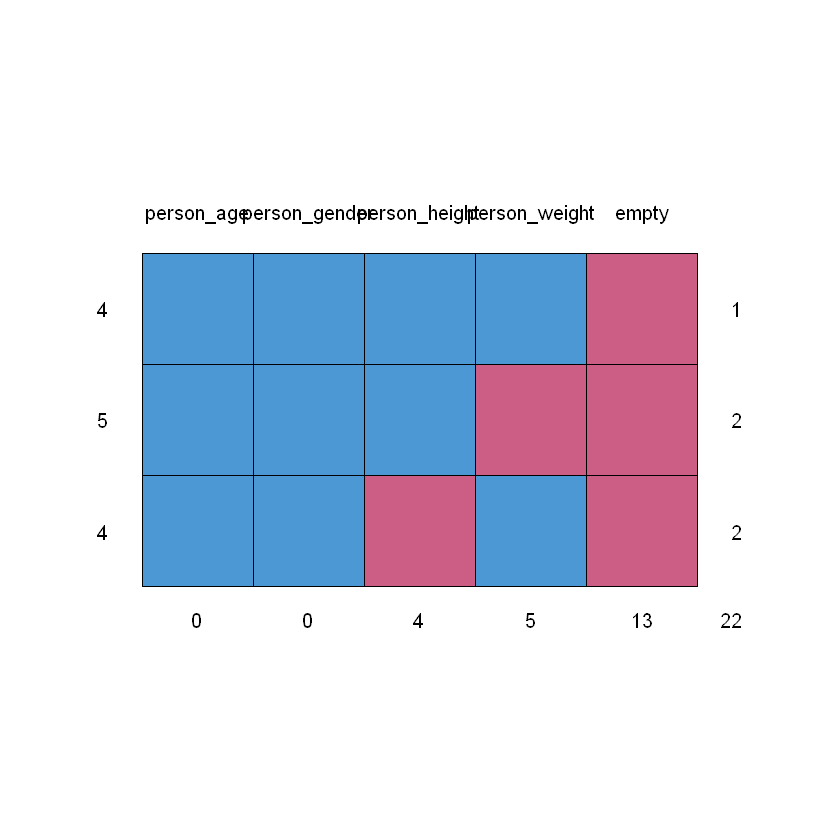

In [76]:
library(mice)
md.pattern(data)


 Variables sorted by number of missings: 
      Variable     Count
         empty 1.0000000
 person_weight 0.3846154
 person_height 0.3076923
    person_age 0.0000000
 person_gender 0.0000000



 Missings in variables:
      Variable Count
 person_height     4
 person_weight     5
         empty    13

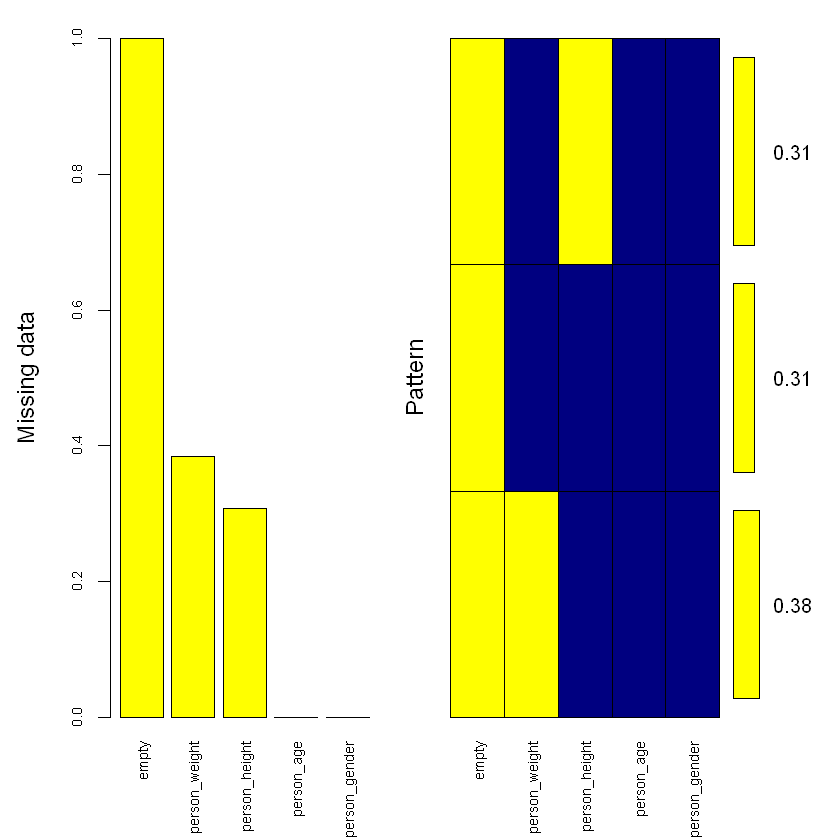

In [77]:
library(VIM)
mice_plot <- aggr(data, 
                  col=c('navyblue','yellow'),
                  numbers=TRUE, 
                  sortVars=TRUE,
                  labels=names(data), 
                  cex.axis=.7,
                  gap=3, 
                  ylab=c("Missing data","Pattern"))
mice_plot

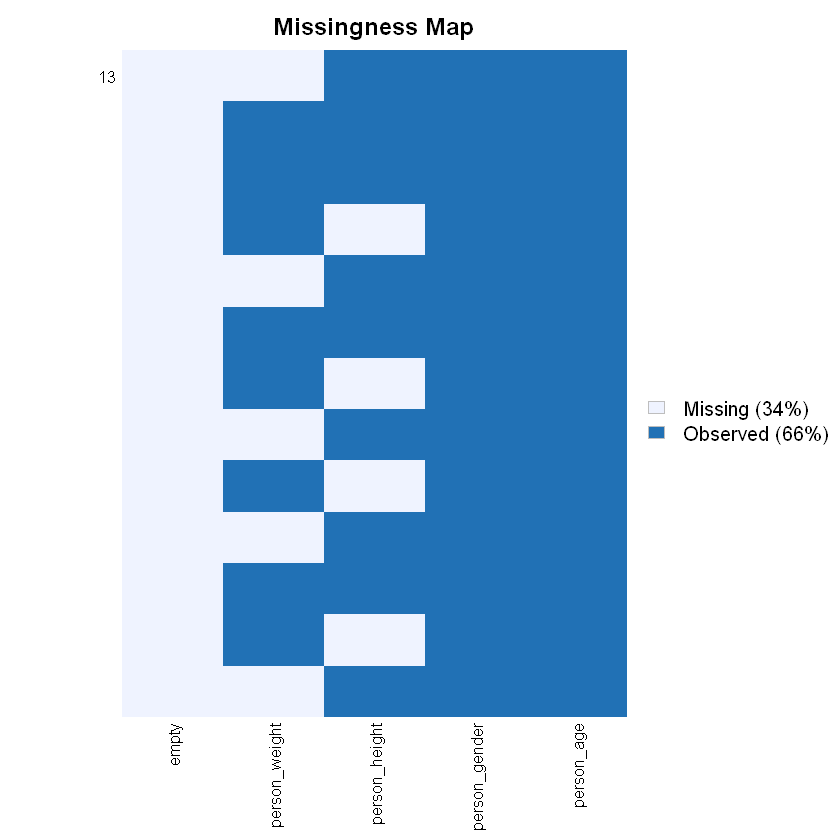

In [78]:
library(Amelia)
Amelia::missmap(data)

Також можна скористатися альтернативними макетами: `missForest`, `mi`.

---

### 3.2. Видалення пустих рядків та сповпців у `data.frame`

Переглянемо стовпці, що містять пропуски:

In [79]:
# Переглянемо список стовпців з пропусками
colnames(data)[apply(data, 2, anyNA)]

[1] "person_height" "person_weight" "empty"

Функція `complete.cases` повертає логічні значення

In [80]:
complete.cases(data) # бо є стовпець Empty

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE

Також видаляти стовпці та рядки з `data.frame` можна за допомогою пакету `janitor`.

In [81]:
library(janitor)
data_cleaned <- remove_empty(data, which = c("rows","cols"), quiet = FALSE)
data_cleaned

No empty rows to remove.

Removing 1 empty columns of 5 columns total (Removed: empty).



,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
1,23,185,NA,male
2,41,175,68.3,male
3,11,142,55.4,female
4,12,NA,48.2,male
5,54,191,NA,female
6,32,168,78.0,female
7,22,NA,54.0,male
8,21,165,NA,male
9,14,NA,90.2,male


In [82]:
write.csv(data_cleaned, file = "../../data/cleaned_titled2.csv", row.names = F)

Як бачимо, колонка `empty` була видалена.

Щоб переглянути усі записи, що не мають пропусків скористаємося функцією `na.omit()`:

In [83]:
na.omit(data_cleaned)

,person_age,person_height,person_weight,person_gender
,<int>,<int>,<dbl>,<chr>
2,41,175,68.3,male
3,11,142,55.4,female
6,32,168,78.0,female
11,41,20,81.0,female


Таким чином пропущені значення будуть видалені з датасети, якщо інформацію переприсвоїти `data <- na.omit(data)`

---

### 3.3. Заміна пропусків у `data.frame`

Існує ряд підходів, що використовуються для заміни пропущених значень у датасеті:

**Заміна на 0**
* Вставте пропущені значення нулем

**Заміна на медіану/середнє значення**
* Для числових змінних - середнє або медіана, мінімум, максимум
* Для категоріальних змінних - мода (бувають випадки, коли моду доцільно використовувати і для цислових)

**Сегментна заміна**
* Визначення сегментів
* Обчислення середнього/медіани/моди для сегментів
* Замінити значення по сегментах
* Наприклад, ми можемо сказати, що кількість опадів майже не змінюється для міст у певній області України, у такому випадку ми можемо для усіх міст з пропусками записати значення середнє по регіону.

**Інтелектуальна заміна** (Частковий випадок сегментної заміни)
* Заміна значень з використанням методів машинного навчання

#### 3.3.1. Заміна пропусків на нуль (0)

In [84]:
data <- read.csv("../../data/cleaned_titled2.csv")
data

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,NA,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,NA,female
32,168,78.0,female
22,NA,54.0,male
21,165,NA,male
14,NA,90.2,male


Замінимо інформацію про вагу з пропусками на `0`:

In [87]:
data_w0 <- data |> mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))
data_w0

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,0.0,female
32,168,78.0,female
22,NA,54.0,male
21,165,0.0,male
14,NA,90.2,male


In [88]:
# Без dplyr
data_w0 <- data
data_w0[is.na(data_w0$person_weight), "person_weight"] <- 0
data_w0

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,0.0,female
32,168,78.0,female
22,NA,54.0,male
21,165,0.0,male
14,NA,90.2,male


Зробити заміну для усіх числових стовпців:

In [89]:
library(tidyr) # for replace_na()
data_all <- data |> mutate_if(is.numeric , replace_na, replace = 0)
data_all


Attaching package: 'tidyr'


The following object is masked from 'package:stringdist':

    extract




person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,0.0,male
41,175,68.3,male
11,142,55.4,female
12,0,48.2,male
54,191,0.0,female
32,168,78.0,female
22,0,54.0,male
21,165,0.0,male
14,0,90.2,male


---

#### 3.3.2. Базова числова заміна пропусків

Заміна на константи або обчислені значення є стандарним підходом. Так, наприклад, заміна певного значення на середнє матиме вигляд:

In [90]:
data_m <- data |> mutate(person_weight = ifelse(is.na(person_weight), mean(data$person_weight, na.rm = T), person_weight))
data_m

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,66.7625,male
41,175,68.3000,male
11,142,55.4000,female
12,NA,48.2000,male
54,191,66.7625,female
32,168,78.0000,female
22,NA,54.0000,male
21,165,66.7625,male
14,NA,90.2000,male


Заміна на min, max, median не відрізняється.

Якщо виникає потреба замінити, наприклад, усі значення на медіану у всіх стовпцях за один прохід можна скористатися функцією `mutate_if()`:

In [91]:
data_all <- data |> mutate_if(is.numeric, function(x) ifelse(is.na(x), median(x, na.rm = T), x))
data_all

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,63.65,male
41,175,68.30,male
11,142,55.40,female
12,171,48.20,male
54,191,63.65,female
32,168,78.00,female
22,171,54.00,male
21,165,63.65,male
14,171,90.20,male


Розгялнемо кілька бібліотек для перевірки даних на наявність про

Ще одним із варіантів заміни значень може бути використання бібліотеки `Hmisc`:

In [92]:
library(Hmisc)
data_wm <- data |> mutate(person_weight = impute(data$person_weight, fun = mean)) # mean imputation
# Аналогічно можна замінити на min,max, median чи інші функції
data_wm 
# * Значення із * - замінені

person_age,person_height,person_weight,person_gender
<int>,<int>,<impute>,<chr>
23,185,66.7625,male
41,175,68.3000,male
11,142,55.4000,female
12,NA,48.2000,male
54,191,66.7625,female
32,168,78.0000,female
22,NA,54.0000,male
21,165,66.7625,male
14,NA,90.2000,male


---

#### 3.3.3. Hot deck imputation (як перекласти???)

Метод `Hot deck imputation` передбачає, що пропущені значення обчислюються шляхом копіювання значень із подібних записів у тому ж наборі даних.

Основне питання при `Hot deck imputation` полягає в тому, як вибрати значення заміни. Одним із поширених підходів є випадковий відбір:

In [93]:
# set.seed(1)
data_hot <- data |> mutate(person_weight = impute(data$person_weight, "random")) 
data_hot 

person_age,person_height,person_weight,person_gender
<int>,<int>,<impute>,<chr>
23,185,59.0,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,78.0,female
32,168,78.0,female
22,NA,54.0,male
21,165,68.3,male
14,NA,90.2,male


Вихідне значення залежить від значення `seed`.

#### 3.3.4. Сегментна заміна пропусків

Заміна по сегментах часто дозволяє будувати точніші математичні моделі, адже групові середні краще описують явища і процеси, ніж загальні для всієї вибірки.

Знайдемо середні значення ваги за статтю та використаємо ці значення для заміни пропусків у даних.

In [94]:
data_sgm <- data |> 
                group_by(person_gender) |>
                mutate(person_weight = replace_na(person_weight, mean(person_weight, na.rm = TRUE)))
data_sgm

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,63.94000,male
41,175,68.30000,male
11,142,55.40000,female
12,NA,48.20000,male
54,191,71.46667,female
32,168,78.00000,female
22,NA,54.00000,male
21,165,63.94000,male
14,NA,90.20000,male


Також можна здійснити заміну значень по усіх стовпцях датасету за один раз. Проте не варто такий підхід використовувати постійно, а враховувати бізнес-логіку процесів, що вивчаються.

In [95]:
data_sgm2 <- data %>% 
  group_by(person_gender) %>% 
    mutate(
      across(everything(), ~replace_na(.x, min(.x, na.rm = TRUE)))
    )
data_sgm2

person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,48.2,male
41,175,68.3,male
11,142,55.4,female
12,165,48.2,male
54,191,55.4,female
32,168,78.0,female
22,165,54.0,male
21,165,48.2,male
14,165,90.2,male


Якщо ж є потреба замінювати по окремих стовпцях, то їх можна вказати замість `everything()`: `across(c("person_height", "person_weight"), ~replace_na(.x, min(.x, na.rm = TRUE)))`.

Іншим варіантом може бути вказання номерів колонок: `across(c(1,3), ~replace_na(.x, min(.x, na.rm = TRUE)))`

#### 3.3.5. Інтелектуальні методи заміни

Теоретично інтелектуальні методи заміни пропусків є найкращими, адже враховують математичні залежності у даних.

In [96]:
library(VIM)
data_knn <- kNN(data)
data_knn
data

person_age,person_height,person_weight,person_gender,person_age_imp,person_height_imp,person_weight_imp,person_gender_imp
<int>,<int>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
23,185,59.0,male,FALSE,FALSE,TRUE,FALSE
41,175,68.3,male,FALSE,FALSE,FALSE,FALSE
11,142,55.4,female,FALSE,FALSE,FALSE,FALSE
12,168,48.2,male,FALSE,TRUE,FALSE,FALSE
54,191,68.3,female,FALSE,FALSE,TRUE,FALSE
32,168,78.0,female,FALSE,FALSE,FALSE,FALSE
22,168,54.0,male,FALSE,TRUE,FALSE,FALSE
21,165,59.0,male,FALSE,FALSE,TRUE,FALSE
14,168,90.2,male,FALSE,TRUE,FALSE,FALSE


person_age,person_height,person_weight,person_gender
<int>,<int>,<dbl>,<chr>
23,185,NA,male
41,175,68.3,male
11,142,55.4,female
12,NA,48.2,male
54,191,NA,female
32,168,78.0,female
22,NA,54.0,male
21,165,NA,male
14,NA,90.2,male


Ще одним схожим методом заміни пропусків може бути здійснення прогнозів на основі регресії чи складніших математичних методів пропусків.

---

## 4. Аналіз та обробка статистичних викидів у даних

**Виявлення аномалій** — це сукупність методів, призначених для виявлення незвичайних точок даних, які мають вирішальне значення для виявлення шахрайства та захисту комп’ютерних мереж від зловмисної діяльності.

**Аномалія** - точка даних або набір точок даних, які не мають таку саму структуру та поведінку, що й інші дані.

Аномалії у даних можуть мати різну природу та по різному себе проявляти:

- [x] Точкова аномалія
    * Єдина точка даних
    * Незвично в порівнянні з іншими даними
    
Приклад: одна добова висока температура 41°С серед ряду звичайних весняних днів

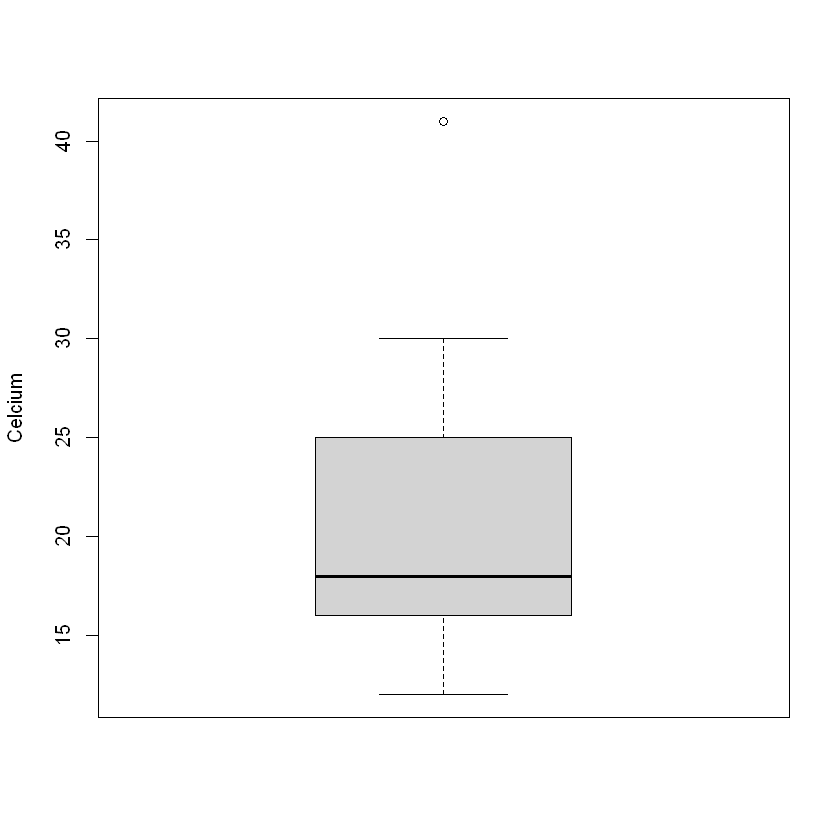

In [97]:
temp <- c(15, 17, 19, 12, 30, 41, 17, 20)
boxplot(temp, ylab = "Celcium")

- [x] Колективна аномалія
    * Аномальна колекція екземплярів даних
    * Незвично, якщо розглядати разом

Опишемо набір даних, до використовуватиметься надалі для прикладів.

`river_eco` - це data.frame, що містить такі три стовпці:
- [x] `index` - цілі числа, що описують порядок спостережень нітратів;
- [x] `nitrate` - місячні концентрації розчинених нітратів у річці;
- [x] `month` - змінна, що містить місяць для кожного спостереження нітратів

Нам потрібно дослідити стовпець `nitrate`, щоб оцінити наявність точкових аномалій у даних.

In [98]:
river_data <- read.csv("../../data/river_eco.csv")
head(river_data)

,index,nitrate,months
,<int>,<dbl>,<chr>
1,1,1.581,January
2,2,1.323,February
3,3,1.140,March
4,4,1.245,April
5,5,1.072,May
6,6,1.483,June


Переглянемо описову статистику показника нітрати:

In [99]:
summary(river_data$nitrate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5920  0.9485  1.0680  1.0649  1.1700  1.8970 

Як видно, медіана та середнє відрізняються не дуже.

Далі перевіримо наявність викидів у даних за допомогою `boxplot`:

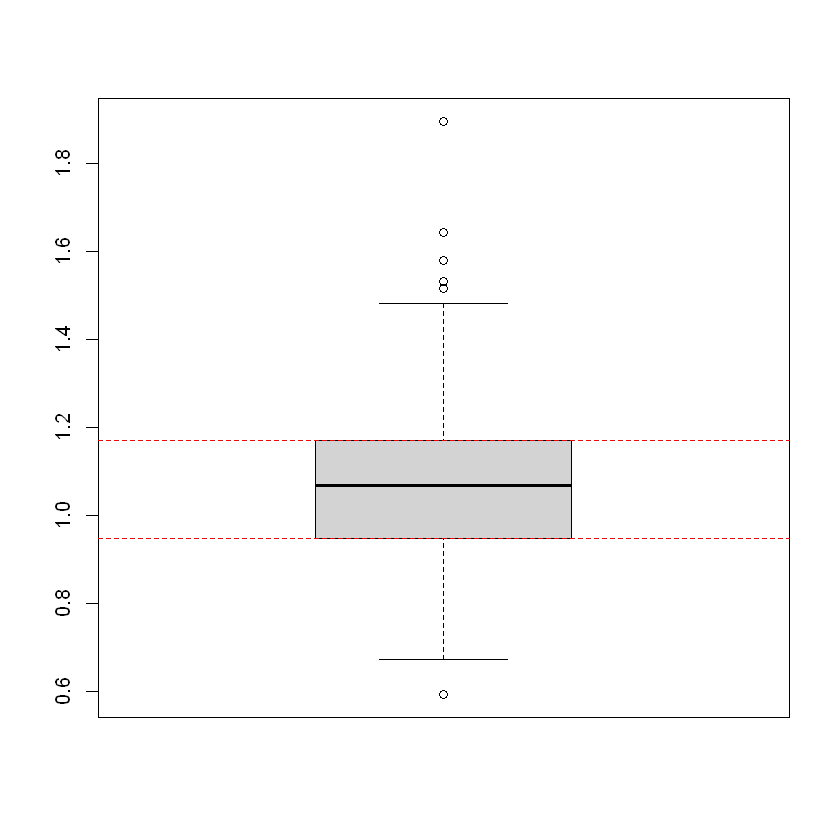

In [100]:
boxplot(river_data$nitrate)
# Додамо лінії 1 та 3 квантилів
abline(h=quantile(river_data$nitrate,0.25),col="red",lty=2)
abline(h=quantile(river_data$nitrate,0.75),col="red",lty=2)

Також виведемо номери рядків спостереженнь, що є викидами:

In [101]:
boxplot.stats(river_data$nitrate)$out

[1] 1.581 1.643 1.533 1.517 1.897 0.592

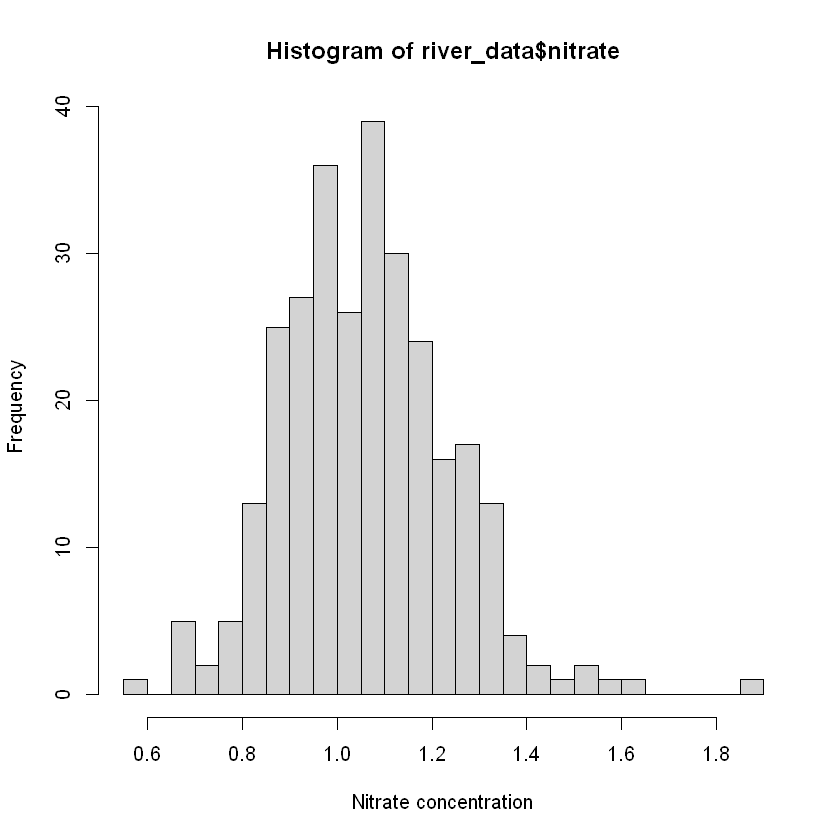

In [102]:
hist(river_data$nitrate, xlab = "Nitrate concentration", breaks = 40)

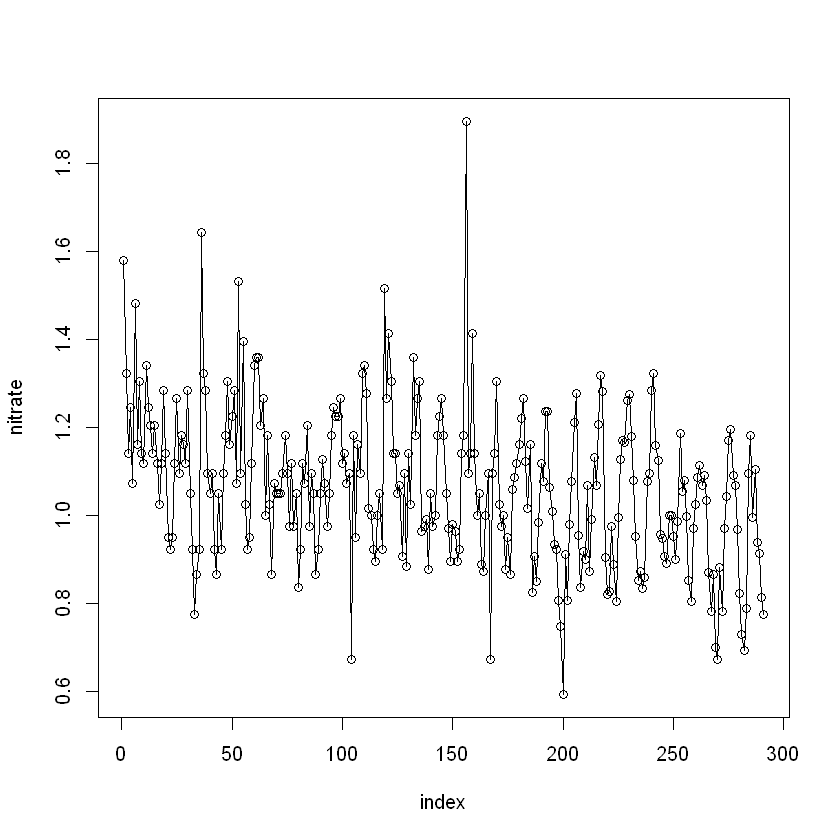

In [103]:
plot(nitrate ~ index, data = river_data, type = "o")

In [104]:
# Середньомісячний вміст нітратів у річці
river_grouped <- river_data |> group_by(months) |> summarise(mean = mean(nitrate))
river_grouped 

months,mean
<chr>,<dbl>
April,1.0166250
August,0.9380833
December,1.2264167
February,1.1838400
January,1.2163600
July,0.9810417
June,0.9792083
March,1.1050400
May,0.9978333


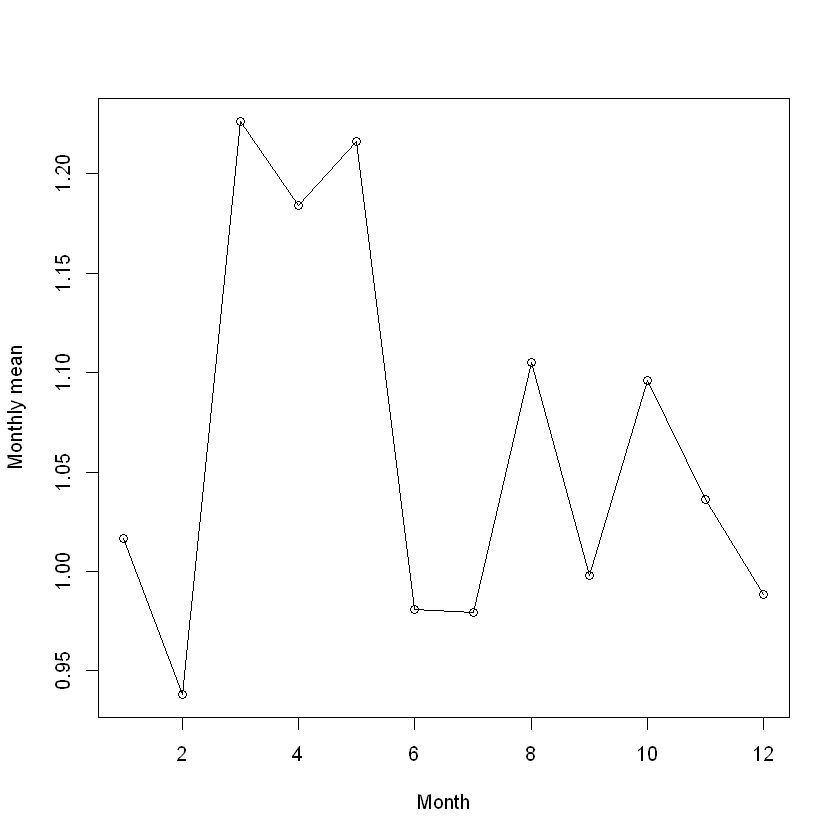

In [105]:
plot(river_grouped$mean, type = "o", xlab = "Month", ylab = "Monthly mean")

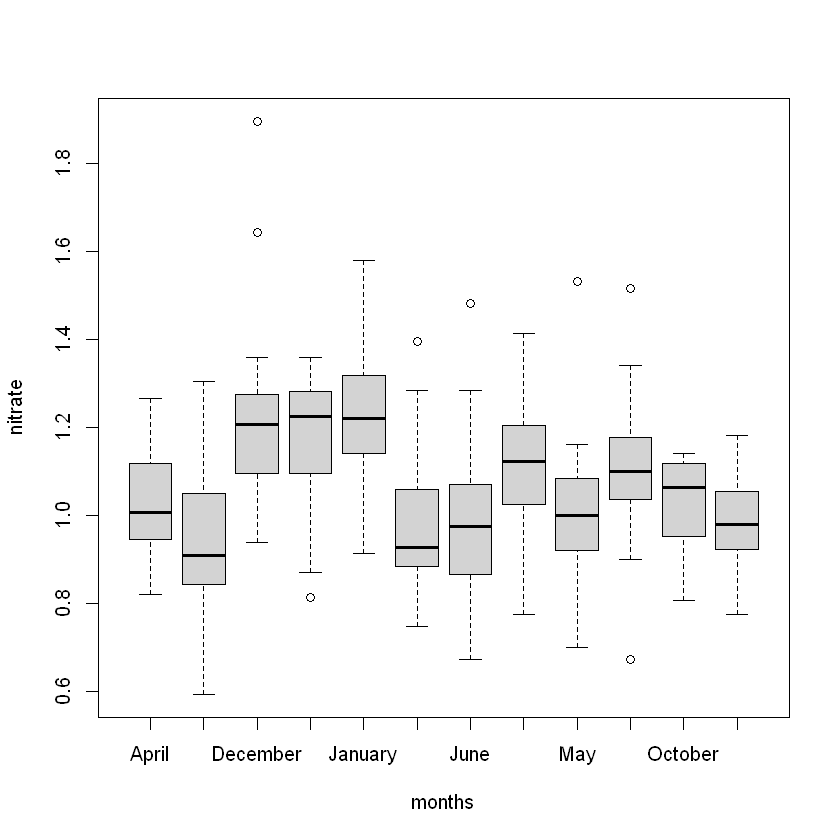

In [106]:
boxplot(nitrate ~ months, data = river_data)

Між Q1 та Q2 зосереджено 50% усіх спостережень. Персентиль відображає кількість спостережень, що зосереджені з ним включно.
Нижче розміщено більше інформації для ознайомлення з інформацією про квантилі.

[Quantile. Wikipedia](https://en.wikipedia.org/wiki/Quantile)

![](../../_static/da-data-cleaning/quantiles.png)

Джерело: https://en.wikipedia.org/wiki/Interquartile_range

![](../../_static/da-data-cleaning/quantiles2.png)

Джерело: https://makemeanalyst.com/explore-your-data-range-interquartile-range-and-box-plot/

Визначивши викиди у даних з ними можна здійснити кілька операцій:

1. Заміна на деякі значення (impute)
2. Заміна на границі квантилей

In [107]:
lower_bound <- quantile(river_data$nitrate, 0.025)
lower_bound

upper_bound <- quantile(river_data$nitrate, 0.975)
upper_bound

2.5% 
0.75475

97.5% 
1.4095

In [108]:
outlier_index <- which(river_data$nitrate < lower_bound | river_data$nitrate > upper_bound)
outlier_index

[1]   1   6  36  53 104 119 121 156 159 167 199 200 269 270 281 282

In [109]:
river_data[outlier_index, ]

,index,nitrate,months
,<int>,<dbl>,<chr>
1,1,1.581,January
6,6,1.483,June
36,36,1.643,December
53,53,1.533,May
104,104,0.671,August
119,119,1.517,November
121,121,1.414,January
156,156,1.897,December
159,159,1.414,March


Таким чином, усі значення вище та нище деякого показника можемо замінити на потрібні нам значення, наприклад, середні за поточний місяць.

Здійснимо заміну значень у наборі даних на основі квантилей:

In [110]:
river_data$nitrate_upd <- river_data$nitrate
qnt <- quantile(river_data$nitrate_upd, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
river_data$nitrate_upd[river_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
river_data$nitrate_upd[river_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

qnt

5%    95% 
0.8050 1.3325

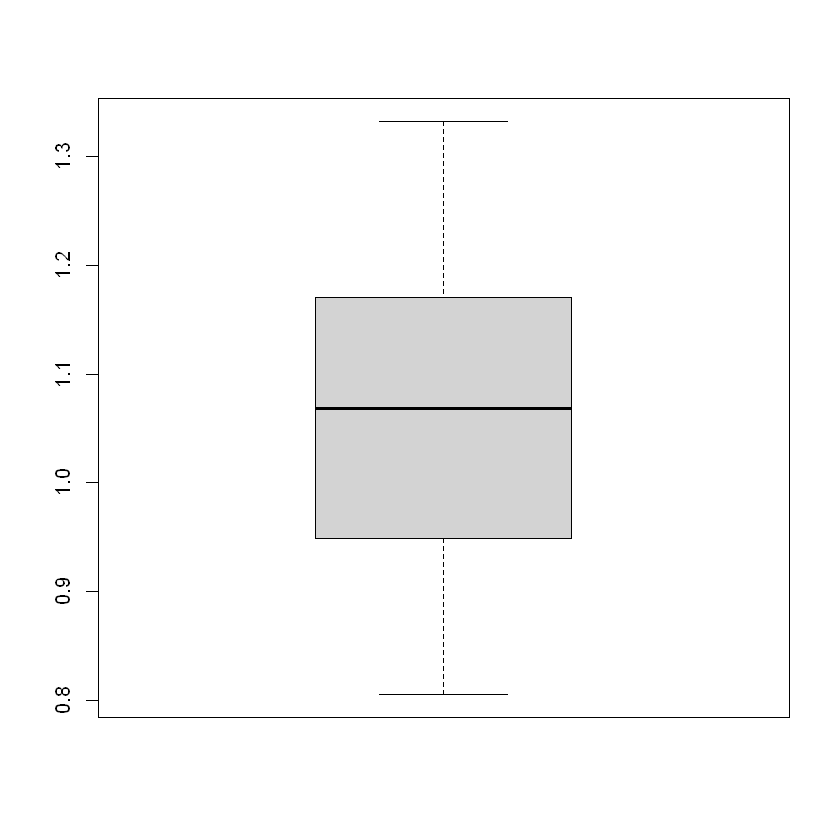

In [111]:
boxplot(river_data$nitrate_upd)

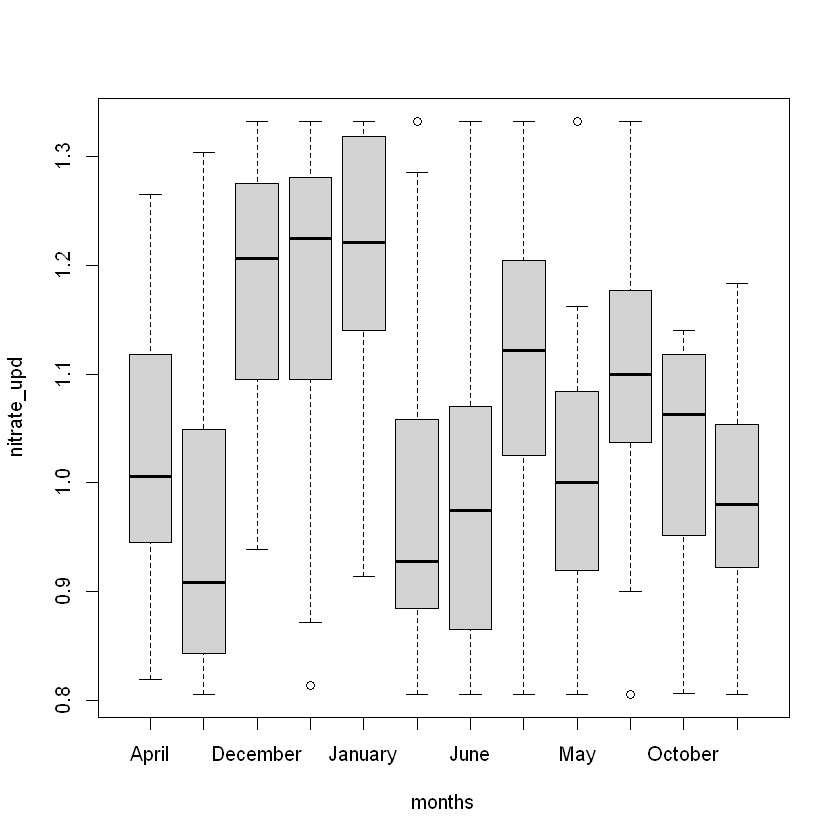

In [112]:
boxplot(nitrate_upd ~ months, data = river_data)

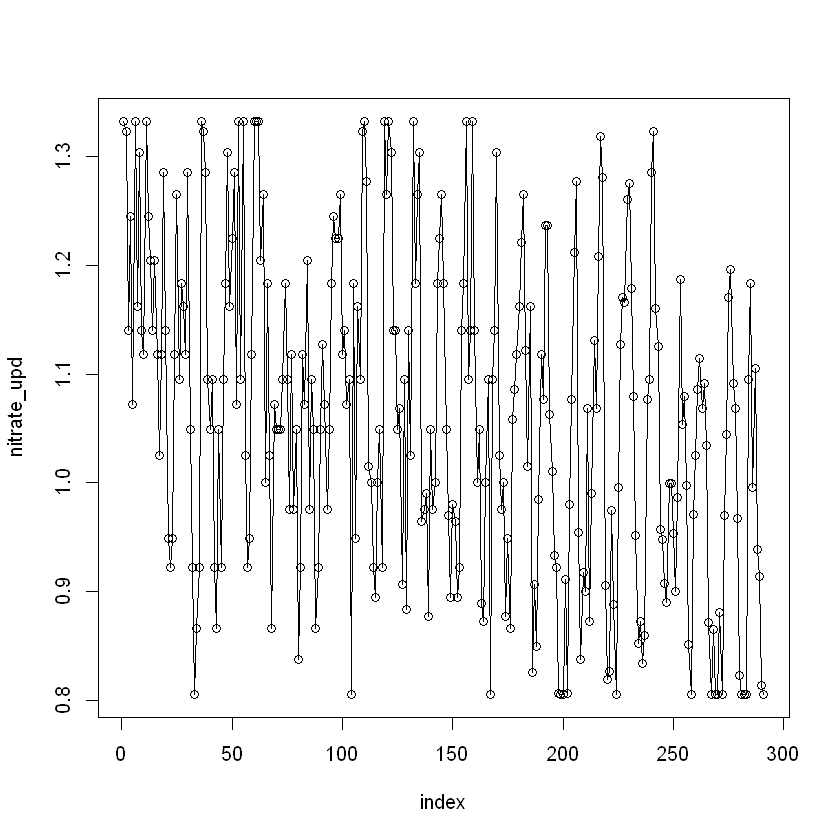

In [113]:
plot(nitrate_upd ~ index, data = river_data, type = "o")

---

## 5. Додаткові прийоми очистки даних <a class="anchor" id="id5"></a>

### 5.1. Видалення дублікатів

In [114]:
df <- data.frame(X = c(1,1,2,1,3,2,1), Y = c("A", "B", "C", "A", "B", "C", "A"))
df

X,Y
<dbl>,<chr>
1,A
1,B
2,C
1,A
3,B
2,C
1,A


In [115]:
df |> distinct()

X,Y
<dbl>,<chr>
1,A
1,B
2,C
3,B


---

# Завдання для практики

!!!

---

# Набори даних

1. https://github.com/kleban/r-book-source/tree/main/datasets/untitled.csv
2. https://github.com/kleban/r-book-source/tree/main/datasets/badtitled.csv
3. https://github.com/kleban/r-book-source/tree/main/datasets/cleaned_titled.csv
4. https://github.com/kleban/r-book-source/tree/main/datasets/cleaned_titled2.csv
5. https://github.com/kleban/r-book-source/tree/main/datasets/river_eco.csv

---

## Використані та додаткові джерела

1. [KPMG Virtual Internship](https://www.insidesherpa.com/virtual-internships/m7W4GMqeT3bh9Nb2c)
2. [An introduction to data cleaning with R / Edwin de Jonge, Mark van der Loo, 2013](https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf)
3. [Anomaly Detection in RAnomaly Detection in R](datacamp.com/courses/anomaly-detection-in-rdatacamp.com/courses/anomaly-detection-in-r)
4. [K-nearest Neighbor: The maths behind it, how it works and an example](https://medium.com/analytics-vidhya/k-nearest-neighbor-the-maths-behind-it-how-it-works-and-an-example-f1de1208546c)
5. [Quantile. Wikipedia](https://en.wikipedia.org/wiki/Quantile)